# Modul

In [54]:
!pip install mlxtend
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Load Data


In [55]:
df = pd.read_csv('/content/Groceries_dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


# Persiapan data


In [57]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [58]:
df = df.rename(columns={'Member_number': 'ID', 'itemDescription': 'Item'})
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [59]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 3)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      38765 non-null  int64 
 1   Date    38765 non-null  object
 2   Item    38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      38765 non-null  int64         
 1   Date    38765 non-null  datetime64[ns]
 2   Item    38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-61-87651bb8c13d>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [62]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Item
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [63]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ID,0
Date,0
Item,0


In [64]:
df['Tanggal'] = df['Date'].dt.day
df['Bulan'] = df['Date'].dt.month
df['Tahun'] = df['Date'].dt.year
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Item,Tanggal,Bulan,Tahun
0,1808,2015-07-21,tropical fruit,21,7,2015
1,2552,2015-01-05,whole milk,5,1,2015
2,2300,2015-09-19,pip fruit,19,9,2015
3,1187,2015-12-12,other vegetables,12,12,2015
4,3037,2015-02-01,whole milk,1,2,2015


In [65]:
df[df['ID'] == 1808]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Item,Tanggal,Bulan,Tahun
0,1808,2015-07-21,tropical fruit,21,7,2015
4355,1808,2015-02-04,long life bakery product,4,2,2015
9090,1808,2014-11-29,meat,29,11,2014
11488,1808,2014-12-15,sugar,15,12,2014
16149,1808,2015-07-21,rolls/buns,21,7,2015
20504,1808,2015-02-04,semi-finished bread,4,2,2015
25239,1808,2014-11-29,whole milk,29,11,2014
27637,1808,2014-12-15,citrus fruit,15,12,2014
36088,1808,2015-07-21,candy,21,7,2015
38731,1808,2014-12-15,napkins,15,12,2014


In [66]:
df[(df['ID'] == 1808) & (df['Date'] == '2015-07-21')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Item,Tanggal,Bulan,Tahun
0,1808,2015-07-21,tropical fruit,21,7,2015
16149,1808,2015-07-21,rolls/buns,21,7,2015
36088,1808,2015-07-21,candy,21,7,2015


In [67]:
df_new = df.groupby(['ID', 'Date'])['Item'].agg(','.join).reset_index()
df_new['Tanggal'] = df_new['Date'].dt.day
df_new['Bulan'] = df_new['Date'].dt.month
df_new['Tahun'] = df_new['Date'].dt.year
df_new.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Item,Tanggal,Bulan,Tahun
0,1000,2014-06-24,"whole milk,pastry,salty snack",24,6,2014
1,1000,2015-03-15,"sausage,whole milk,semi-finished bread,yogurt",15,3,2015
2,1000,2015-05-27,"soda,pickled vegetables",27,5,2015
3,1000,2015-07-24,"canned beer,misc. beverages",24,7,2015
4,1000,2015-11-25,"sausage,hygiene articles",25,11,2015
5,1001,2014-02-07,"sausage,whole milk,rolls/buns",7,2,2014
6,1001,2014-12-12,"whole milk,soda",12,12,2014
7,1001,2015-01-20,"frankfurter,soda,whipped/sour cream",20,1,2015
8,1001,2015-04-14,"beef,white bread",14,4,2015
9,1001,2015-05-02,"frankfurter,curd",2,5,2015


# Visualisasi


In [68]:
df_new.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Item,Tanggal,Bulan,Tahun
0,1000,2014-06-24,"whole milk,pastry,salty snack",24,6,2014
1,1000,2015-03-15,"sausage,whole milk,semi-finished bread,yogurt",15,3,2015
2,1000,2015-05-27,"soda,pickled vegetables",27,5,2015
3,1000,2015-07-24,"canned beer,misc. beverages",24,7,2015
4,1000,2015-11-25,"sausage,hygiene articles",25,11,2015


In [69]:
df_new.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Tanggal,Bulan,Tahun
count,14963.000000,14963,14963.000000,14963.000000,14963.000000
mean,3006.840807,2014-12-18 16:25:16.701196288,15.752122,6.504110,2014.466618
min,1000.000000,2014-01-01 00:00:00,1.000000,1.000000,2014.000000
25%,2005.000000,2014-06-21 00:00:00,8.000000,4.000000,2014.000000
50%,3010.000000,2014-12-09 00:00:00,16.000000,7.000000,2014.000000
75%,4015.000000,2015-06-18 00:00:00,23.000000,9.000000,2015.000000
max,5000.000000,2015-12-30 00:00:00,31.000000,12.000000,2015.000000
std,1152.947471,NaN,8.807570,3.429494,0.498901


In [70]:
# Filter data untuk tahun 2014 dan 2015
df_2014 = df_new[df_new['Tahun'] == 2014]
df_2015 = df_new[df_new['Tahun'] == 2015]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# Group by bulan dan hitung jumlah transaksi untuk setiap tahun
monthly_transactions_2014 = df_2014.groupby('Bulan')['ID'].count()
monthly_transactions_2015 = df_2015.groupby('Bulan')['ID'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


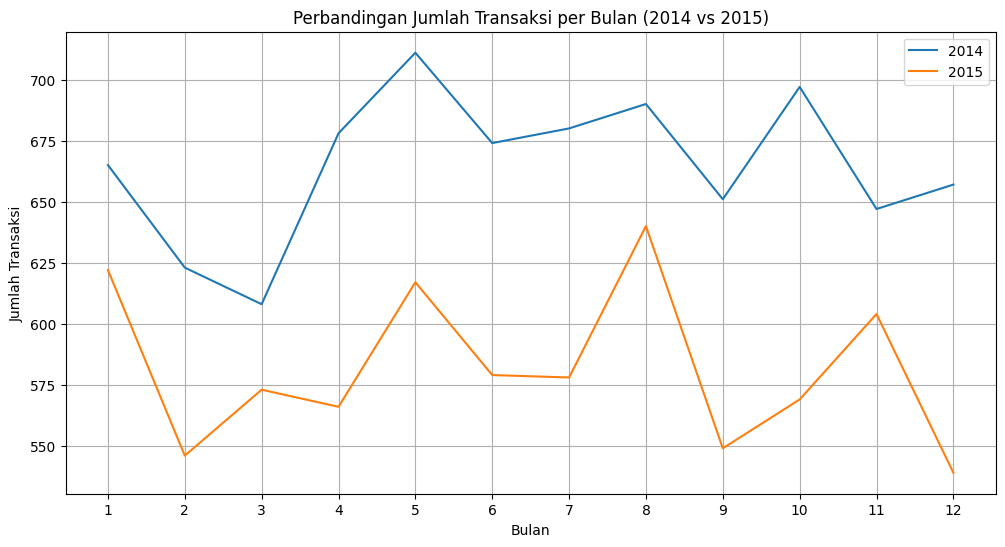

In [72]:
# Buat visualisasi
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions_2014.index, monthly_transactions_2014.values, label='2014')
plt.plot(monthly_transactions_2015.index, monthly_transactions_2015.values, label='2015')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Perbandingan Jumlah Transaksi per Bulan (2014 vs 2015)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Menghitung jumlah pembelian setiap item
item_counts = df.groupby('Item')['ID'].count().sort_values(ascending=False)

# Mengambil 10 item terbanyak
top_10_items = item_counts.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


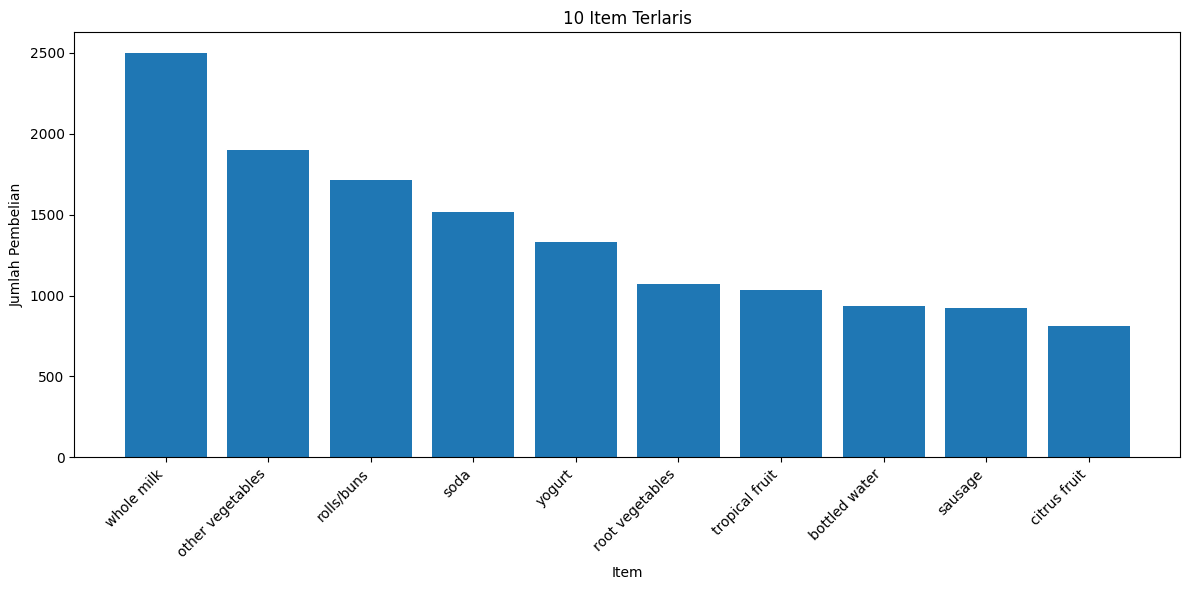

In [74]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_items.index, top_10_items.values)
plt.xlabel('Item')
plt.ylabel('Jumlah Pembelian')
plt.title('10 Item Terlaris')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
combination_lengths = {}
for _, row in df_new.iterrows():
  items = row['Item'].split(',')
  combination_length = len(items)
  if combination_length not in combination_lengths:
    combination_lengths[combination_length] = 0
  combination_lengths[combination_length] += 1

for length, count in combination_lengths.items():
  print(f"Panjang kombinasi {length} = {count}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Panjang kombinasi 3 = 2698
Panjang kombinasi 4 = 1390
Panjang kombinasi 2 = 10080
Panjang kombinasi 8 = 145
Panjang kombinasi 7 = 80
Panjang kombinasi 5 = 344
Panjang kombinasi 6 = 175
Panjang kombinasi 9 = 50
Panjang kombinasi 11 = 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


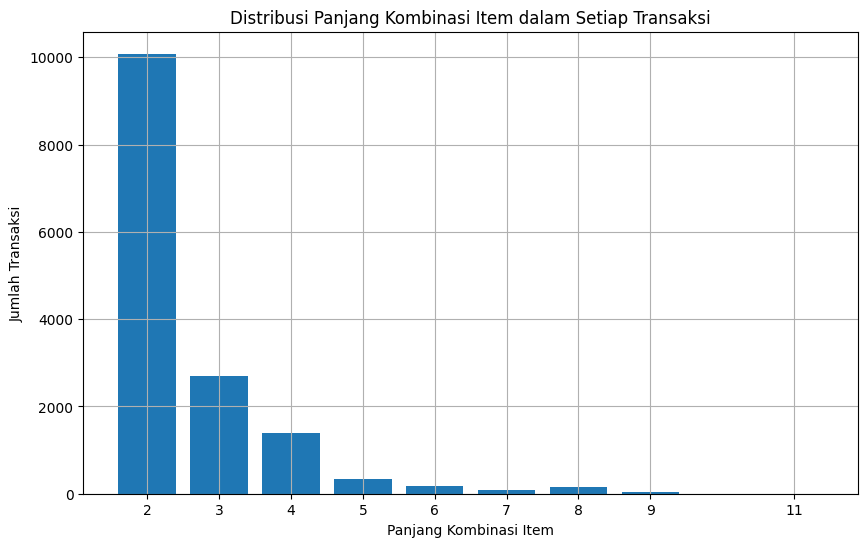

In [76]:
lengths = list(combination_lengths.keys())
counts = list(combination_lengths.values())

plt.figure(figsize=(10, 6))
plt.bar(lengths, counts)
plt.xlabel("Panjang Kombinasi Item")
plt.ylabel("Jumlah Transaksi")
plt.title("Distribusi Panjang Kombinasi Item dalam Setiap Transaksi")
plt.xticks(lengths)
plt.grid(True)
plt.show()

# Data Mining / Apriori

In [77]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Date,Item,Tanggal,Bulan,Tahun
0,1808,2015-07-21,tropical fruit,21,7,2015
1,2552,2015-01-05,whole milk,5,1,2015
2,2300,2015-09-19,pip fruit,19,9,2015
3,1187,2015-12-12,other vegetables,12,12,2015
4,3037,2015-02-01,whole milk,1,2,2015


In [78]:
df_apriori= df[['ID','Item']]
df_apriori.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Item
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk


In [79]:
df_apriori.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Item
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk


In [80]:
df_apriori['Item'] = df_apriori['Item'].str.split(',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-80-b258b79fcb58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['Item'] = df_apriori['Item'].str.split(',')


In [81]:
df_transaksi = df_apriori.groupby('ID')['Item'].apply(list).reset_index()
df_transaksi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Item
0,1000,"[[soda], [canned beer], [sausage], [sausage], ..."
1,1001,"[[frankfurter], [frankfurter], [beef], [sausag..."
2,1002,"[[tropical fruit], [butter milk], [butter], [f..."
3,1003,"[[sausage], [root vegetables], [rolls/buns], [..."
4,1004,"[[other vegetables], [pip fruit], [root vegeta..."
...,...,...
3893,4996,"[[dessert], [salty snack], [rolls/buns], [misc..."
3894,4997,"[[tropical fruit], [white wine], [whole milk],..."
3895,4998,"[[rolls/buns], [curd]]"
3896,4999,"[[bottled water], [butter milk], [tropical fru..."


In [82]:
my_basket = df_apriori.explode('Item').pivot_table(index='ID', columns='Item', aggfunc=lambda x: 1, fill_value=0)
my_basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
ID,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df_transaksi_hitung = pd.DataFrame(my_basket.sum() / my_basket.shape[0], columns=['Support']).sort_values('Support', ascending=False)
df_transaksi_hitung

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Item,
whole milk,0.458184
other vegetables,0.376603
rolls/buns,0.349666
soda,0.313494
yogurt,0.282966
...,...
make up remover,0.001283
bags,0.001026
baby cosmetics,0.000770


In [84]:
q1 = df_transaksi_hitung['Support'].quantile(0.25)
q2 = df_transaksi_hitung['Support'].quantile(0.50)
q3 = df_transaksi_hitung['Support'].quantile(0.75)

print(f"Q1 (Persentil ke 25): {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3 (Presentil ke 75): {q3}")

Q1 (Persentil ke 25): 0.007824525397639816
Q2 (Median): 0.02180605438686506
Q3 (Presentil ke 75): 0.06516162134427911


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Level support
support_levels = [0.01,0.02,0.03,0.04,0.05, 0.06, 0.07, 0.08, 0.09]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
for support in support_levels:
    frequent_itemsets = apriori(my_basket, min_support=support, use_colnames=True)
    print(f"Jumlah frequent itemsets untuk support {support}: {len(frequent_itemsets)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Jumlah frequent itemsets untuk support 0.01: 3016


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Jumlah frequent itemsets untuk support 0.02: 894
Jumlah frequent itemsets untuk support 0.03: 415


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Jumlah frequent itemsets untuk support 0.04: 248
Jumlah frequent itemsets untuk support 0.05: 165
Jumlah frequent itemsets untuk support 0.06: 116
Jumlah frequent itemsets untuk support 0.07: 83
Jumlah frequent itemsets untuk support 0.08: 65


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in wors

Jumlah frequent itemsets untuk support 0.09: 51


In [87]:
frequent_items = apriori(my_basket, min_support = 0.05,use_colnames = True)
frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
160,0.050539,"(whole milk, tropical fruit, other vegetables)"
161,0.071832,"(whole milk, other vegetables, yogurt)"
162,0.065162,"(whole milk, soda, rolls/buns)"
163,0.065931,"(whole milk, rolls/buns, yogurt)"


In [88]:
rules_ap = association_rules(frequent_items, metric="lift", min_threshold=0.1)
rules_ap.sort_values('confidence', ascending=False, inplace=True)
rules_ap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
196,"(bottled water, other vegetables)",(whole milk),0.093894,0.458184,0.056183,0.598361,1.305941,0.013162,1.349012,0.258544
238,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507,0.264348
250,"(rolls/buns, yogurt)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420,0.014917,1.328521,0.254605
208,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,0.014859,1.229837,0.212124
256,"(soda, yogurt)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,0.009720,1.225537,0.198033
...,...,...,...,...,...,...,...,...,...,...
80,(whole milk),(frozen vegetables),0.458184,0.102617,0.055156,0.120381,1.173110,0.008139,1.020195,0.272353
257,(whole milk),"(soda, yogurt)",0.458184,0.097486,0.054387,0.118701,1.217622,0.009720,1.024073,0.329867
233,(whole milk),"(tropical fruit, other vegetables)",0.458184,0.091329,0.050539,0.110302,1.207749,0.008693,1.021326,0.317475
221,(whole milk),"(sausage, other vegetables)",0.458184,0.092868,0.050282,0.109742,1.181702,0.007732,1.018954,0.283791


1. Antecedents
Antecedents adalah item atau kumpulan item yang berada di sebelah kiri aturan asosiasi, yang menyebabkan (atau memprediksi) item lain di sebelah kanan aturan (consequents).
- Contoh: Jika aturan adalah {Susu} → {Roti}, maka Susu adalah antecedent. Artinya, aturan ini menyatakan bahwa jika seseorang membeli Susu, mereka mungkin juga membeli Roti.
2. Consequents
Consequents adalah item atau kumpulan item yang berada di sebelah kanan aturan asosiasi. Ini adalah item yang cenderung dibeli bersama dengan antecedents.
- Contoh: Jika aturan adalah {Susu} → {Roti}, maka Roti adalah consequent. Artinya, aturan ini menunjukkan bahwa jika seseorang membeli Susu, ada kemungkinan besar mereka juga akan membeli Roti.
3. Antecedent Support
Antecedent support adalah proporsi transaksi dalam dataset yang mengandung antecedent. Ini adalah angka yang menunjukkan seberapa sering antecedent muncul dalam semua transaksi.
Formula:
Antecedent Support
=
Jumlah transaksi dengan antecedent
Total transaksi
Antecedent Support=
Total transaksi
Jumlah transaksi dengan antecedent
​

- Contoh: Jika dalam dataset terdapat 100 transaksi dan Susu muncul dalam 20 transaksi, maka antecedent support untuk Susu adalah 0.20 atau 20%.
4. Consequent Support
Consequent support adalah proporsi transaksi dalam dataset yang mengandung consequent. Ini menunjukkan seberapa sering consequent muncul dalam seluruh dataset.
Formula:
Consequent Support
=
Jumlah transaksi dengan consequent
Total transaksi
Consequent Support=
Total transaksi
Jumlah transaksi dengan consequent
​

- Contoh: Jika Roti muncul dalam 15 dari 100 transaksi, maka consequent support untuk Roti adalah 0.15 atau 15%.
5. Support
Support adalah proporsi transaksi yang mengandung kedua item (antecedent dan consequent) dalam dataset. Ini adalah probabilitas bahwa antecedent dan consequent muncul bersama dalam satu transaksi.
Formula:
Support
=
Jumlah transaksi dengan antecedent dan consequent
Total transaksi
Support=
Total transaksi
Jumlah transaksi dengan antecedent dan consequent
​

- Contoh: Jika dalam 100 transaksi, Susu dan Roti dibeli bersama dalam 10 transaksi, maka support untuk aturan {Susu} → {Roti} adalah 0.10 atau 10%.
6. Confidence
Confidence adalah proporsi transaksi yang mengandung antecedent, di mana consequent juga muncul. Ini mengukur seberapa sering consequent terjadi jika antecedent terjadi, dengan kata lain, probabilitas consequent muncul dengan syarat antecedent sudah muncul.
Formula:
Confidence
=
Support (antecedent & consequent)
Antecedent Support
Confidence=
Antecedent Support
Support (antecedent & consequent)
​
- Contoh: Jika Susu muncul dalam 20 transaksi, dan dari 20 transaksi tersebut, Roti juga muncul dalam 10 transaksi, maka confidence untuk aturan {Susu} → {Roti} adalah 0.5 atau 50%. Artinya, 50% dari pembelian Susu diikuti dengan pembelian Roti.
7. Lift
Lift adalah rasio antara confidence aturan dan consequent support. Ini mengukur sejauh mana antecedent dan consequent lebih sering muncul bersama-sama daripada jika mereka benar-benar independen. Lift memberi informasi tentang kekuatan hubungan antara antecedent dan consequent.

- Lift
=
Confidence /
Consequent Support

Interpretasi:
- Lift = 1: Antecedent dan consequent independen (tidak ada hubungan).
- Lift > 1: Antecedent meningkatkan kemungkinan terjadinya consequent (hubungan positif).
- Lift < 1: Antecedent menurunkan kemungkinan terjadinya consequent (hubungan negatif).

In [89]:
# Filter aturan-aturan yang memenuhi kondisi tertentu
filtered_rules = rules_ap[(rules_ap['lift'] > 1) & (rules_ap['confidence'] >= 0.1)]

for index, row in filtered_rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    print(f"Aturan {index + 1}: {antecedents} -> {consequents}")

Aturan 197: ['bottled water', 'other vegetables'] -> ['whole milk']
Aturan 239: ['other vegetables', 'yogurt'] -> ['whole milk']
Aturan 251: ['rolls/buns', 'yogurt'] -> ['whole milk']
Aturan 209: ['other vegetables', 'rolls/buns'] -> ['whole milk']
Aturan 257: ['soda', 'yogurt'] -> ['whole milk']
Aturan 227: ['other vegetables', 'soda'] -> ['whole milk']
Aturan 233: ['tropical fruit', 'other vegetables'] -> ['whole milk']
Aturan 245: ['rolls/buns', 'soda'] -> ['whole milk']
Aturan 178: ['shopping bags'] -> ['whole milk']
Aturan 221: ['sausage', 'other vegetables'] -> ['whole milk']
Aturan 12: ['bottled beer'] -> ['whole milk']
Aturan 82: ['frozen vegetables'] -> ['whole milk']
Aturan 4: ['beef'] -> ['whole milk']
Aturan 194: ['yogurt'] -> ['whole milk']
Aturan 44: ['canned beer'] -> ['whole milk']
Aturan 72: ['domestic eggs'] -> ['whole milk']
Aturan 66: ['curd'] -> ['whole milk']
Aturan 24: ['bottled water'] -> ['whole milk']
Aturan 36: ['butter'] -> ['whole milk']
Aturan 172: ['sausa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Aturan 165: ['root vegetables'] -> ['yogurt']
Aturan 196: ['whole milk', 'other vegetables'] -> ['bottled water']
Aturan 157: ['sausage'] -> ['root vegetables']
Aturan 190: ['yogurt'] -> ['tropical fruit']
Aturan 174: ['yogurt'] -> ['sausage']
Aturan 169: ['sausage'] -> ['tropical fruit']
Aturan 22: ['bottled water'] -> ['tropical fruit']
Aturan 232: ['whole milk', 'other vegetables'] -> ['tropical fruit']
Aturan 199: ['bottled water'] -> ['whole milk', 'other vegetables']
Aturan 220: ['whole milk', 'other vegetables'] -> ['sausage']
Aturan 182: ['soda'] -> ['tropical fruit']
Aturan 142: ['rolls/buns'] -> ['root vegetables']
Aturan 160: ['soda'] -> ['root vegetables']
Aturan 187: ['whole milk'] -> ['tropical fruit']
Aturan 242: ['yogurt'] -> ['whole milk', 'other vegetables']
Aturan 17: ['bottled water'] -> ['root vegetables']
Aturan 166: ['yogurt'] -> ['root vegetables']
Aturan 150: ['rolls/buns'] -> ['tropical fruit']
Aturan 107: ['other vegetables'] -> ['root vegetables']
Aturan 14:

In [90]:
# Hitung jumlah aturan asosiasi yang dihasilkan
jumlah_aturan = len(rules_ap)
frequent = len(frequent_items)

print("Jumlah Aturan frequent (Apriori):", frequent)
print("Jumlah Aturan Asosiasi (Apriori):", jumlah_aturan)

Jumlah Aturan frequent (Apriori): 165
Jumlah Aturan Asosiasi (Apriori): 260


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- Frequent Itemset = {Susu, Roti}
- Asosiasi = Jika seseorang membeli Susu, mereka juga mungkin membeli Roti (Susu → Roti).


# contoh

## contoh 2

### contoh 3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
